<a href="https://colab.research.google.com/github/joapen/ML-Learning-bucket/blob/main/marketbreadthdata_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

###  Project Definition  ###

PROJECT_ID = 'Looking for correlation between DIX, GEX and SPX'

FILEPATH = "/content/drive/MyDrive/public/DREAM/Amplitud-Mercado-2021-05-30.csv" 

used_features = ['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME']

TARGET_COLUMN = 'SPXCLOSE'

print("Setup Complete")

Setup Complete


In [4]:
###   Load data + features    ###
df = pd.read_csv(FILEPATH)

# Step 1 Shift SPXCLOSE 1 day 
dfSPXCLOSE = df.SPXCLOSE.shift(-1)
df.SPXCLOSE = dfSPXCLOSE

# after the shift(-1) the last line at least is NaN, so we remove it
df = df.dropna(axis = 0, how ='any')
df.set_index('DATE')
split_date ="2020-01-02"
train_data = df.loc[df['DATE'] <= split_date]
test_data = df.loc[df['DATE'] > split_date]

# Filter rows with missing values
train_data = train_data.dropna(axis=0)
#test_data = test_data.dropna(axis=0)

description = pd.Series(['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME'])
# Choose target and features
train_y = train_data.SPXCLOSE
val_y = test_data.SPXCLOSE

train_X = train_data[used_features]
val_X = test_data[used_features]

print("Setup Complete")

Setup Complete


# 1.- Exploratory Data Analysis (EDA)

**** First 5 lines of TRAIN data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME
0,1979-12-31,500,10395,362,3735,100,11,1761,7590,755,14740,756,11310,84,75,469,5480,105.760002,31530000
1,1980-01-02,250,8000,1016,12798,91,24,1363,7712,442,8220,1148,29610,61,36,325,2780,105.220001,40610000
2,1980-01-03,178,6414,1174,13307,56,55,1270,6259,455,15710,1143,29160,14,63,324,5610,106.519997,50480000
3,1980-01-04,815,14608,193,2299,52,11,1612,6573,1246,31870,296,4680,47,17,329,2580,106.809998,39130000
4,1980-01-07,546,11813,293,3132,78,11,1786,7975,914,26060,625,13640,90,10,370,4800,108.949997,44500000


**** Info() data of the TRAIN data set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10089 entries, 0 to 10088
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              10089 non-null  object 
 1   ADVNASDAQ         10089 non-null  int64  
 2   ADVNASDAQVOLUMEN  10089 non-null  int64  
 3   DESNASDAQ         10089 non-null  int64  
 4   DESNASDAQVOLUMEN  10089 non-null  int64  
 5   NASDAQMAX         10089 non-null  int64  
 6   NASDAQMIN         10089 non-null  int64  
 7   NASDAQREP         10089 non-null  int64  
 8   NASDAQREPVOLUMEN  10089 non-null  int64  
 9   ADVNYSE           10089 non-null  int64  
 10  ADVNYSEVOLUMEN    10089 non-null  int64  
 11  DESNYSE           10089 non-null  int64  
 12  DESNYSEVOLUMEN    10089 non-null  int64  
 13  NYSEMAX           10089 non-null  int64  
 14  NYSEMIN           10089 non-null  int64  
 15  NYSEREP           10089 non-null  int64  
 16  

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


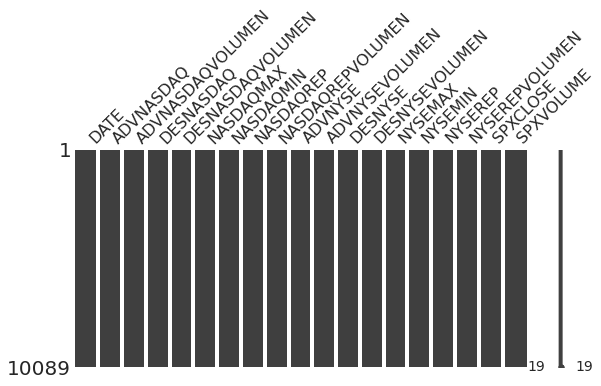

In [6]:
####        Optional     ######

###  Display basic data for TRAINING dataset ###

print("**** First 5 lines of TRAIN data:")
display(train_data.head(5))
print("**** Info() data of the TRAIN data set:")
display(train_data.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': train_data.isnull().sum(),
                                 'missing_values (%)': round(train_data.isnull().sum() * 100 / len(train_data),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(train_data, figsize=(8, 4));

**** First 5 lines of TEST data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME
10089,2020-01-03,1189,1288719446,2026,1297118933,108,13,101,30495999,1387,1473906712,1543,2053583838,145,9,88,37214773,3246.280029,3461290000
10090,2020-01-06,1740,1666638365,1482,1227042883,100,29,108,45255518,1558,2134033269,1347,1725138374,125,8,117,58812948,3237.179932,3674070000
10091,2020-01-07,1444,1176714386,1767,1294621200,144,20,116,26064157,1290,1611479166,1652,1954277292,131,11,85,54568678,3253.050049,3420380000
10092,2020-01-08,1923,1450356259,1312,1080536158,212,19,115,35792305,1744,1937885932,1197,1853805514,213,12,88,83383992,3274.699951,3720890000
10093,2020-01-09,1882,1646993492,1350,948269979,259,17,129,57200352,1643,2059981783,1291,1755979401,241,13,97,35873196,3265.350098,3638390000


**** Info() data of the TEST data set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 10089 to 10438
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              350 non-null    object 
 1   ADVNASDAQ         350 non-null    int64  
 2   ADVNASDAQVOLUMEN  350 non-null    int64  
 3   DESNASDAQ         350 non-null    int64  
 4   DESNASDAQVOLUMEN  350 non-null    int64  
 5   NASDAQMAX         350 non-null    int64  
 6   NASDAQMIN         350 non-null    int64  
 7   NASDAQREP         350 non-null    int64  
 8   NASDAQREPVOLUMEN  350 non-null    int64  
 9   ADVNYSE           350 non-null    int64  
 10  ADVNYSEVOLUMEN    350 non-null    int64  
 11  DESNYSE           350 non-null    int64  
 12  DESNYSEVOLUMEN    350 non-null    int64  
 13  NYSEMAX           350 non-null    int64  
 14  NYSEMIN           350 non-null    int64  
 15  NYSEREP           350 non-null    int64  
 16 

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


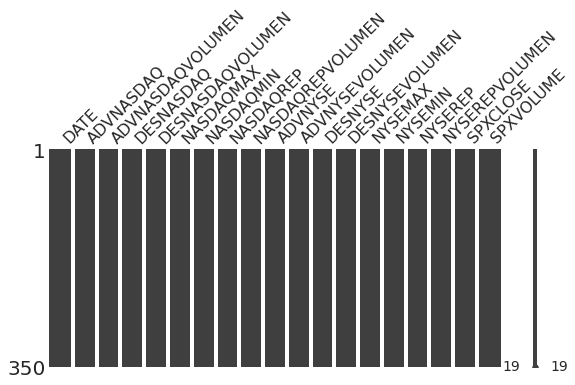

In [7]:
####        Optional     ######

###  Display basic data for TESTING dataset ###

print("**** First 5 lines of TEST data:")
display(test_data.head(5))
print("**** Info() data of the TEST data set:")
display(test_data.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': test_data.isnull().sum(),
                                 'missing_values (%)': round(test_data.isnull().sum() * 100 / len(test_data),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(test_data, figsize=(8, 4));

### Volume of data
Training = 10.089 Testing = 350

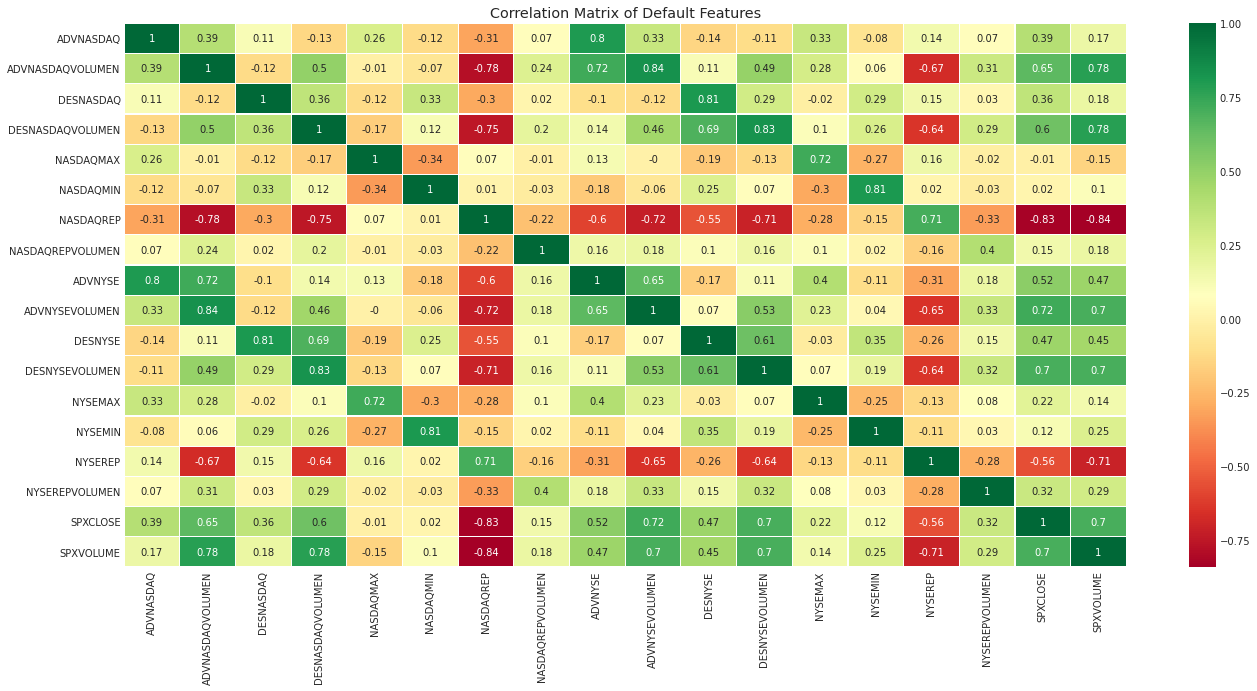

In [8]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMap
fig, ax = pltHeatMap.subplots(figsize=(20, 10))
corr = train_data.corr().round(2)
sns.heatmap(corr, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features')
del corr

### Relative changes on data
Let's make a new dataframe with the percentage changes

In [9]:
pct_change_df = pd.DataFrame(data=train_data.DATE)
pct_change_df.set_index('DATE')

for featureX in used_features:
  pct_change_df[featureX + 'DailyReturn'] = train_data[featureX].pct_change()

pct_change_df.dropna()
pct_change_df.head()


,DATE,ADVNASDAQDailyReturn,ADVNASDAQVOLUMENDailyReturn,DESNASDAQDailyReturn,DESNASDAQVOLUMENDailyReturn,NASDAQMAXDailyReturn,NASDAQMINDailyReturn,NASDAQREPDailyReturn,NASDAQREPVOLUMENDailyReturn,ADVNYSEDailyReturn,ADVNYSEVOLUMENDailyReturn,DESNYSEDailyReturn,DESNYSEVOLUMENDailyReturn,NYSEMAXDailyReturn,NYSEMINDailyReturn,NYSEREPDailyReturn,NYSEREPVOLUMENDailyReturn,SPXCLOSEDailyReturn,SPXVOLUMEDailyReturn
0,1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-01-02,-0.500000,-0.230399,1.806630,2.426506,-0.090000,1.181818,-0.226008,0.016074,-0.414570,-0.442334,0.518519,1.618037,-0.273810,-0.520000,-0.307036,-0.492701,-0.005106,0.287980
2,1980-01-03,-0.288000,-0.198250,0.155512,0.039772,-0.384615,1.291667,-0.068232,-0.188408,0.029412,0.911192,-0.004355,-0.015198,-0.770492,0.750000,-0.003077,1.017986,0.012355,0.243044
3,1980-01-04,3.578652,1.277518,-0.835605,-0.827234,-0.071429,-0.800000,0.269291,0.050168,1.738462,1.028644,-0.741032,-0.839506,2.357143,-0.730159,0.015432,-0.540107,0.002723,-0.224842
4,1980-01-07,-0.330061,-0.191334,0.518135,0.362331,0.500000,0.000000,0.107940,0.213297,-0.266453,-0.182303,1.111486,1.914530,0.914894,-0.411765,0.124620,0.860465,0.020036,0.137235


In [ ]:
# Nasty, raw drawing of data related to the percentages
# to be commented once we figure out what's cooking
#i = 0
#for featureV in used_features:
#  print(featureV)
#  plt.figure(figsize=(20,8))
#  plt.title(featureV)
#  sns.lineplot(data=train_data, x='DATE', y=featureV, label=featureV)
#  i = +1
#  print("i=" + str(i))



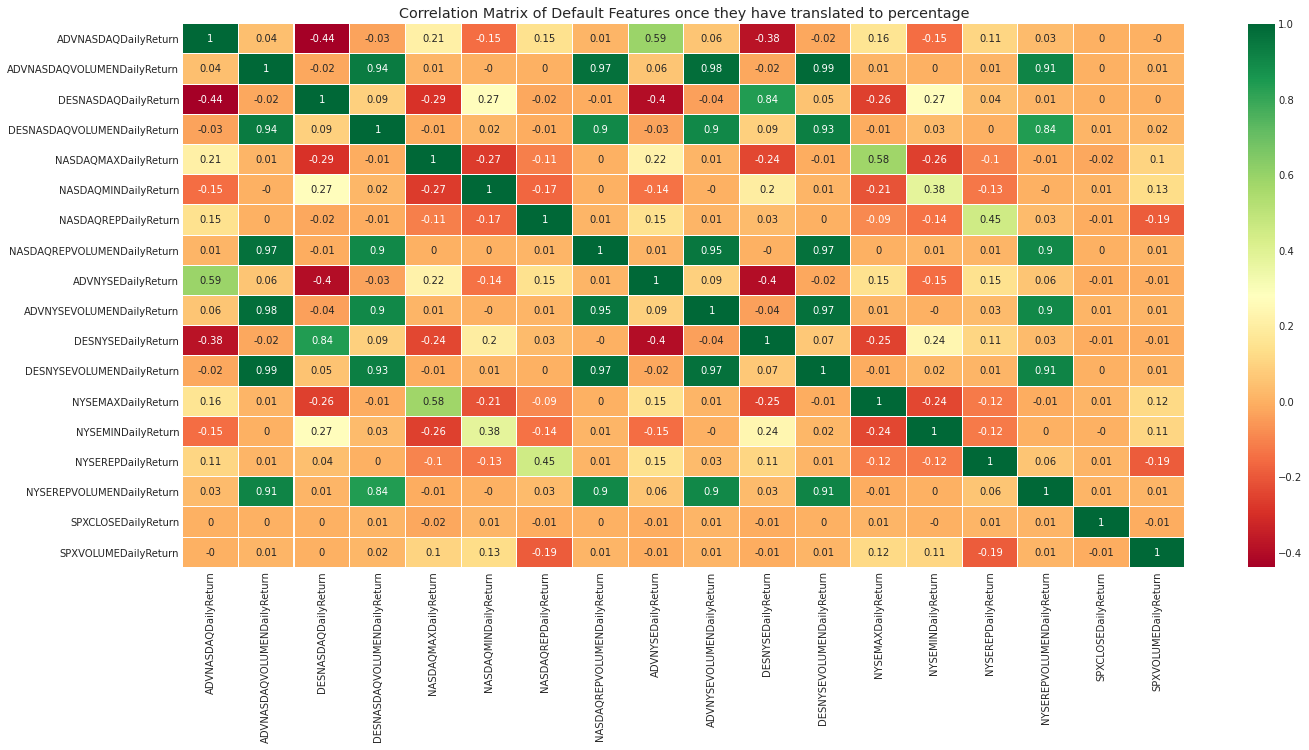

In [10]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMapPct
fig, ax = pltHeatMapPct.subplots(figsize=(20, 10))
corr_pct = pct_change_df.corr().round(2)
sns.heatmap(corr_pct, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features once they have translated to percentage')
del corr_pct

# 5.- Classification and model
In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

In [11]:
from xgboost import XGBRegressor

model_1 = XGBRegressor(n_estimators=100, learning_rate=0.05)
model_2 = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_4 = XGBRegressor(n_estimators=2000, learning_rate=0.05)
model_5 = XGBRegressor(n_estimators=3000, learning_rate=0.05)
model_6 = XGBRegressor(n_estimators=100, learning_rate=0.1)
model_7 = XGBRegressor(n_estimators=500, learning_rate=0.1)
model_8 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_9 = XGBRegressor(n_estimators=2000, learning_rate=0.1)
model_10 = XGBRegressor(n_estimators=3000, learning_rate=0.1)

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

# Add silent=True to avoid printing out updates with each cycle
#my_model.fit(train_X, train_y, verbose=False)
print ("Models completed")

Models completed


Let's run each one of the models and check its mean absolute error (MAE)

In [12]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=train_X, X_v=val_X, y_t=train_y, y_v=val_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)


for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %4f" % (i+1, mae))

[07:19:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 1 MAE: 349.502010
[07:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 2 MAE: 285.623416
[07:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 3 MAE: 285.244051
[07:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 4 MAE: 285.363329
[07:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 5 MAE: 285.440529
[07:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model 6 MAE: 294.052391
[07:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecat

Now I check the Mean Aboslute Error of the 10 run models and I pick the best one (lower MAE)

In [13]:
# make predictions using the model we think it's better
predictions = model_3.predict(val_X)

#from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

print("\nModel Accuracy: %4f" % model_3.score(val_X, predictions))

Mean Absolute Error : 285.24405133928406

Model Accuracy: 1.000000


## 5.1.- Check the results

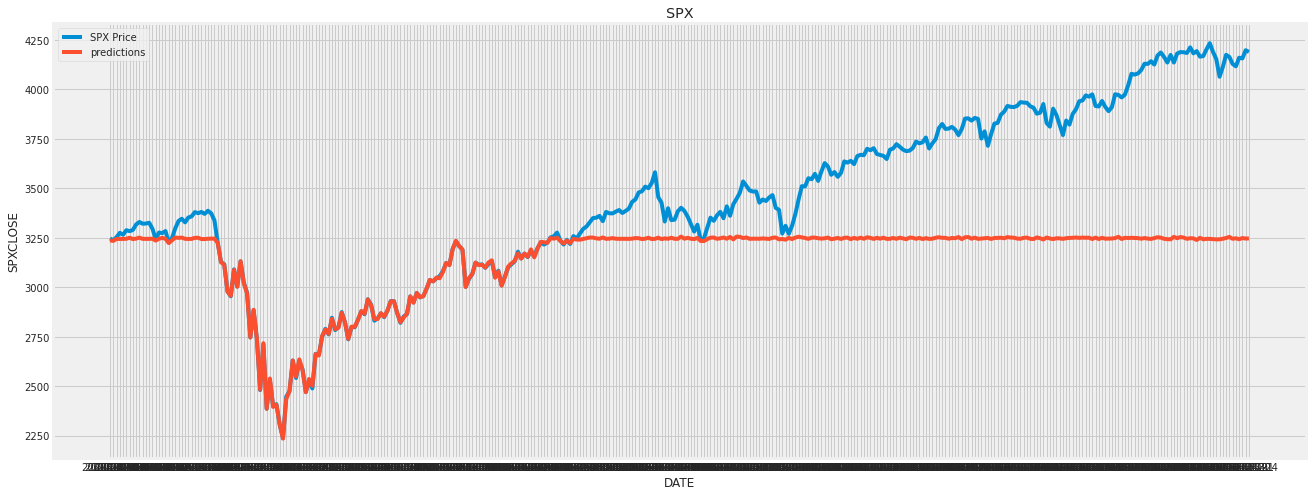

In [14]:
####        Optional     ######
import matplotlib.pyplot as pltResults

%matplotlib inline

# Set basic data
pltResults.figure(figsize=(20,8))
pltResults.title("SPX")
sns.lineplot(data=test_data, x='DATE', y='SPXCLOSE', label="SPX Price")
sns.lineplot(data=test_data, x='DATE', y=predictions, label="predictions")

## 5.2.- Analysis of the results

count    350.000000
mean     284.225628
std      315.548133
min      -12.817627
25%        3.067017
50%      136.313110
75%      550.977417
max      988.451416
Name: SPXCLOSE, dtype: float64


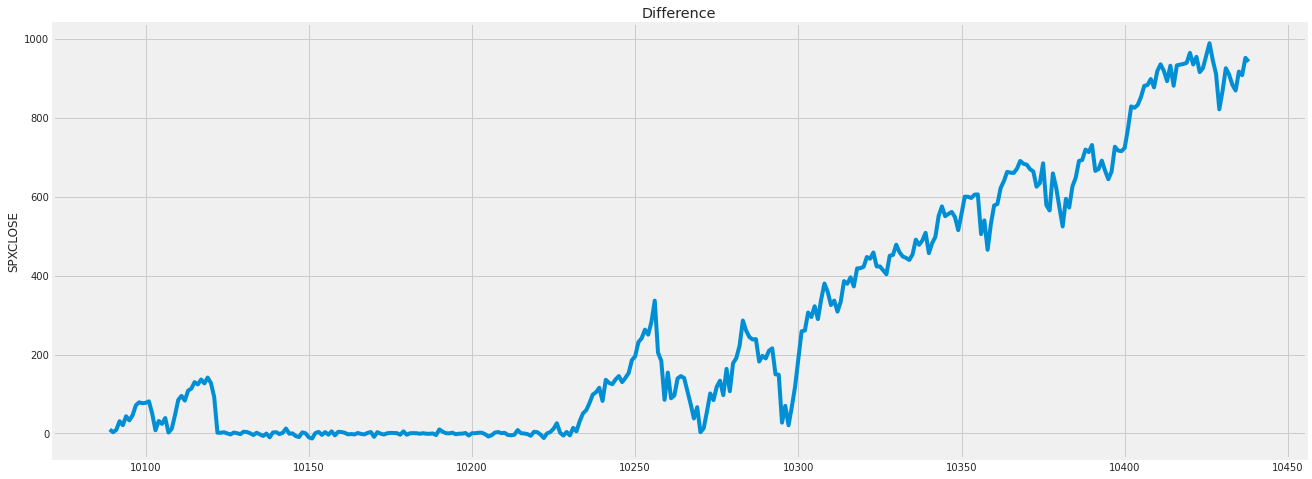

In [15]:
dif = test_data.SPXCLOSE - predictions
print(dif.describe())
# Set basic data
pltResults.figure(figsize=(20,8))
pltResults.title("Difference")
sns.lineplot(data=dif)

In [ ]:
# 6.- Let's check the performance of the prediction: TP, FP, TN, FN

In [16]:
# Let's check the table of results
TP = 0   # true positive
FP = 0   # False positive
TN = 0   # True negative
FN = 0   # False negative
accurateTP = 0 # accurate True Positive
accurateTN = 0 # accurate True Negative
totalRes = len(predictions)

# I use 3 basic points to define a threshold
threshold = 3

resultT = pd.DataFrame(test_data.SPXCLOSE)
resultT["pred"] = predictions
resultT["dif"] = dif

arrRes = resultT.to_numpy()

for x in arrRes:
    if (x[0]>0 and x[1]>0):
        TP += 1
        if x[2]<threshold:
            accurateTP +=1
    if (x[0]<0 and x[1]>0):
        FP += 1
    if (x[0]<0 and x[1]<0):
        TN += 1
        if x[2]<threshold:
            accurateTN +=1
    if (x[0]>0 and x[1]<0):
        FN += 1

pTP = (TP/totalRes) * 100
pAccurateTP = (accurateTP/totalRes) *100
pFP = (FP/totalRes) * 100
pTN = (TN/totalRes) * 100
pAccurateTN = (accurateTN/totalRes) *100
pFN = (FN/totalRes) * 100

print("Total = " +str(TP+FP+TN+FN))
print("\nTP = " + str(TP) + "( %2f" % pTP + " )")
print("FP = " + str(FP) + "( %2f" % pFP + " )")
print("TN = " + str(TN) + "( %2f" % pTN + " )")
print("FN = " + str(FN) + "( %2f" % pFP + " )")

print("\nright guess = " + str(TP + TN) + "( %2f" % (pTP+pTN) + " )")
print("error = " + str(FP + FN) + "( %2f" % (pFP+pFN) + " )")
print("\nAccurate TP = " + str(accurateTP) + "( %2f" % pAccurateTP + " )")
print("Accurate TN = " + str(accurateTN) + "( %2f" % pAccurateTN + " )")

Total = 350

TP = 350( 100.000000 )
FP = 0( 0.000000 )
TN = 0( 0.000000 )
FN = 0( 0.000000 )

right guess = 350( 100.000000 )
error = 0( 0.000000 )

Accurate TP = 87( 24.857143 )
Accurate TN = 0( 0.000000 )
